# Projet 1 Train L

# Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from google.colab import files
import io
import pandas as pd
from difflib import Differ
import string


#Import data

In [2]:
# Après exécution de cette cellule, vous devez charger le jeu de données précédemment téléchargé
uploaded = files.upload()

Saving train_l.jsonl to train_l.jsonl


In [20]:
df = pd.read_json(io.BytesIO(uploaded['train_l.jsonl']), lines=True)
df

,qID,sentence,option1,option2,answer
0,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,2
1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,1
2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1,"He never comes to my home, but I always go to ...",home,house,1
3,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2,"He never comes to my home, but I always go to ...",home,house,2
4,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2,"Kyle doesn't wear leg warmers to bed, while Lo...",Kyle,Logan,2
...,...,...,...,...,...
10229,391JB9X4Z0MKRYGJWQK2RMI7S79MKF-1,"Paint was applied to the scooter, but not the ...",scooter,car,1
10230,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL-1,Eric was looking through the old temple and fo...,Eric,Matthew,1
10231,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL-2,Eric was looking through the old temple and fo...,Eric,Matthew,2
10232,32L724R85LIKCHO145FI3C9HCFHPIR-2,The dentist did not scold Natalie for not flos...,Natalie,Emily,2


#Regroup pairs

In [21]:
df["GroupID"] = df["qID"].str[:-2]
df

,qID,sentence,option1,option2,answer,GroupID
0,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,2,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE
1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE
2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1,"He never comes to my home, but I always go to ...",home,house,1,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4
3,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2,"He never comes to my home, but I always go to ...",home,house,2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4
4,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2,"Kyle doesn't wear leg warmers to bed, while Lo...",Kyle,Logan,2,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH
...,...,...,...,...,...,...
10229,391JB9X4Z0MKRYGJWQK2RMI7S79MKF-1,"Paint was applied to the scooter, but not the ...",scooter,car,1,391JB9X4Z0MKRYGJWQK2RMI7S79MKF
10230,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL-1,Eric was looking through the old temple and fo...,Eric,Matthew,1,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL
10231,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL-2,Eric was looking through the old temple and fo...,Eric,Matthew,2,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL
10232,32L724R85LIKCHO145FI3C9HCFHPIR-2,The dentist did not scold Natalie for not flos...,Natalie,Emily,2,32L724R85LIKCHO145FI3C9HCFHPIR


# Identical sentences

In [42]:
# Compter le nombre de phrases identiques
sentence_counts = df['sentence'].value_counts()

duplicates = sentence_counts[sentence_counts > 1]
print("\nPhrases dupliquées :")
print(duplicates)


Phrases dupliquées :
sentence
The waves destroyed the garage but left the house intact because the _ was so close to the shore.    2
The waves destroyed the garage but left the house intact because the _ was so far from the shore.    2
Name: count, dtype: int64


#1. Special case / alternate

## 1.1. Extraction

In [22]:
# Fonction de nettoyage des mots (minuscules et suppression de la ponctuation)
def clean_word(word):
    # Convertir en minuscules
    word = word.lower()
    # Supprimer la ponctuation
    word = word.translate(str.maketrans('', '', string.punctuation))
    return word

In [23]:
def find_differences(group):
    if len(group) == 2:  # Si le groupe a exactement 2 phrases
        sentence1, sentence2 = group.iloc[0]["sentence"], group.iloc[1]["sentence"]

        words1 = set(sentence1.split())  # Découpe la phrase en mots
        words2 = set(sentence2.split())  # Découpe l'autre phrase en mots

        diff1 = words1 - words2  # Mots dans phrase1 mais pas dans phrase2
        diff2 = words2 - words1  # Mots dans phrase2 mais pas dans phrase1

        # Nettoyer les différences
        cleaned_diff1 = {clean_word(word) for word in diff1}
        cleaned_diff2 = {clean_word(word) for word in diff2}

        # Retourner les différences sous forme de chaînes de caractères distinctes
        return pd.Series([", ".join(cleaned_diff1), ", ".join(cleaned_diff2)], index=['diff1', 'diff2'])

    elif len(group) == 1:  # Si une seule phrase dans le groupe
        return pd.Series([None, None], index=['diff1', 'diff2'])

    return pd.Series([None, None], index=['diff1', 'diff2'])

# Appliquer la fonction aux groupes
df_diff = df.groupby("GroupID").apply(find_differences).reset_index()

# Étape 3 : Ajouter les différences dans le DataFrame original
df = pd.merge(df, df_diff, on="GroupID", how="left")
df


<ipython-input-23-9f297b090e72>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_diff = df.groupby("GroupID").apply(find_differences).reset_index()


,qID,sentence,option1,option2,answer,GroupID,diff1,diff2
0,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,2,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE,despised,enjoyed
1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE,despised,enjoyed
2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1,"He never comes to my home, but I always go to ...",home,house,1,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4,smaller,bigger
3,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2,"He never comes to my home, but I always go to ...",home,house,2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4,smaller,bigger
4,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2,"Kyle doesn't wear leg warmers to bed, while Lo...",Kyle,Logan,2,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH,colder,warmer
...,...,...,...,...,...,...,...,...
10229,391JB9X4Z0MKRYGJWQK2RMI7S79MKF-1,"Paint was applied to the scooter, but not the ...",scooter,car,1,391JB9X4Z0MKRYGJWQK2RMI7S79MKF,storage,"an, accident"
10230,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL-1,Eric was looking through the old temple and fo...,Eric,Matthew,1,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL,explorer,mummy
10231,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL-2,Eric was looking through the old temple and fo...,Eric,Matthew,2,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL,explorer,mummy
10232,32L724R85LIKCHO145FI3C9HCFHPIR-2,The dentist did not scold Natalie for not flos...,Natalie,Emily,2,32L724R85LIKCHO145FI3C9HCFHPIR,,scolded


In [24]:
df['sorted_pair'] = df.apply(lambda row: tuple(sorted([row['diff1'], row['diff2']])), axis=1)

# Utiliser groupby pour compter les occurrences des paires
pair_counts = df.groupby('sorted_pair').size().reset_index(name='count')
pair_counts['count'] = pair_counts['count'] / 2

# Trier pour afficher le classement
ranked_pairs = pair_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

print(ranked_pairs)

                      sorted_pair  count
0                    (less, more)  141.0
1                    (big, small)   88.0
2                  (large, small)   85.0
3                  (strong, weak)   44.0
4             (although, because)   44.0
...                           ...    ...
3397        (convoluted, evident)    1.0
3398                (cooked, raw)    1.0
3399               (cooked, swam)    1.0
3400    (cooked, a, couldnt, the)    1.0
3401  (would, only, wouldnt, the)    1.0

[3402 rows x 2 columns]


<ipython-input-25-055892a9e4bb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='sorted_pair_str', data=ranked_pairs.head(15), palette='viridis')


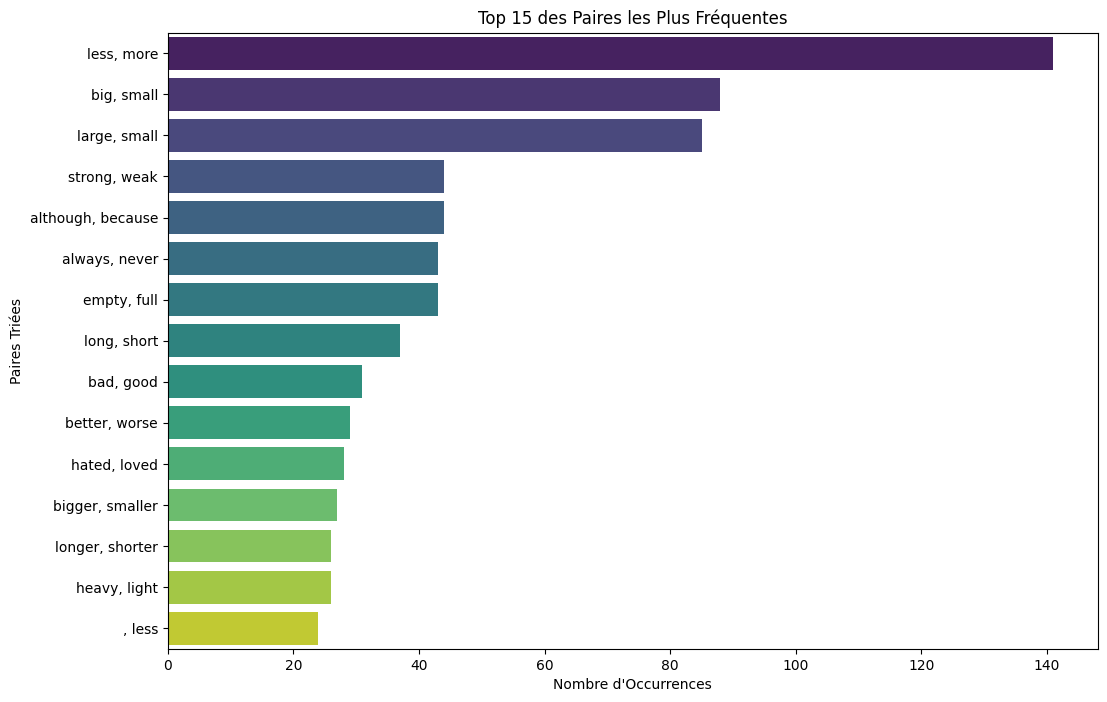

In [25]:
# Convertir les tuples de sorted_pair en chaînes de caractères
ranked_pairs['sorted_pair_str'] = ranked_pairs['sorted_pair'].apply(lambda x: ', '.join(map(str, x)))

# Réinitialiser l'index pour éviter les problèmes avec MultiIndex
ranked_pairs = ranked_pairs.reset_index(drop=True)

# Créer un graphique à barres des paires les plus fréquentes
plt.figure(figsize=(12, 8))

# Tracer le graphique avec seaborn
sns.barplot(x='count', y='sorted_pair_str', data=ranked_pairs.head(15), palette='viridis')

# Ajouter les titres et les labels
plt.title('Top 15 des Paires les Plus Fréquentes')
plt.xlabel('Nombre d\'Occurrences')
plt.ylabel('Paires Triées')

# Afficher le graphique
plt.show()

In [26]:
df

,qID,sentence,option1,option2,answer,GroupID,diff1,diff2,sorted_pair
0,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,2,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE,despised,enjoyed,"(despised, enjoyed)"
1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE,despised,enjoyed,"(despised, enjoyed)"
2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1,"He never comes to my home, but I always go to ...",home,house,1,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4,smaller,bigger,"(bigger, smaller)"
3,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2,"He never comes to my home, but I always go to ...",home,house,2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4,smaller,bigger,"(bigger, smaller)"
4,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2,"Kyle doesn't wear leg warmers to bed, while Lo...",Kyle,Logan,2,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH,colder,warmer,"(colder, warmer)"
...,...,...,...,...,...,...,...,...,...
10229,391JB9X4Z0MKRYGJWQK2RMI7S79MKF-1,"Paint was applied to the scooter, but not the ...",scooter,car,1,391JB9X4Z0MKRYGJWQK2RMI7S79MKF,storage,"an, accident","(an, accident, storage)"
10230,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL-1,Eric was looking through the old temple and fo...,Eric,Matthew,1,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL,explorer,mummy,"(explorer, mummy)"
10231,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL-2,Eric was looking through the old temple and fo...,Eric,Matthew,2,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL,explorer,mummy,"(explorer, mummy)"
10232,32L724R85LIKCHO145FI3C9HCFHPIR-2,The dentist did not scold Natalie for not flos...,Natalie,Emily,2,32L724R85LIKCHO145FI3C9HCFHPIR,,scolded,"(, scolded)"


## 1.2. Manipulation

In [35]:
# Afficher les phrases contenant (less, more)
df['sorted_pair_str'] = df['sorted_pair'].apply(lambda x: ', '.join(x).strip())

# Filtrer les lignes où 'sorted_pair' est égal à 'less, more'
filtered_df = df[df['sorted_pair_str'] == 'less, more']

# Afficher les phrases correspondantes
pd.set_option('display.max_colwidth', None)
print(filtered_df['sentence'])

18                                                 Megan has a lot less money than Jessica because _ just bought the winning lottery ticket.
19                                                 Megan has a lot more money than Jessica because _ just bought the winning lottery ticket.
218       Derrick spent the entire summer laying on the hot beach, while Jeffrey spent the summer indoors, so _ 's hair had more sun damage.
219       Derrick spent the entire summer laying on the hot beach, while Jeffrey spent the summer indoors, so _ 's hair had less sun damage.
224                                            Robert made the choice to buy Neil's house, so _ had a lot more money in the bank afterwards.
                                                                        ...                                                                 
10039                                      Jeffrey doesn't believe in using the microwave like Neil does because _ is less health conscious.
10154        

In [39]:
# Regrouper les catégories similaires dans une nouvelle colonne
def categorize_pair(pair):
    if pair in ['big, small', 'large, small', 'bigger, smaller', 'long, short', 'longer, shorter']:
        return 'size_category'  # Regroupe big/small et large/small dans "size_category"
    elif pair == 'less, more':
        return 'quantity_category'
    elif pair == 'colder, warmer':
        return 'temperature_category'
    elif pair == 'empty, full':
        return 'capacity_category'
    else:
        return 'other'

# Appliquer la fonction pour créer une nouvelle colonne
df['category'] = df['sorted_pair_str'].apply(categorize_pair)

<ipython-input-40-1fea5c5954b7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='category', data=ranked_categories.head(15), palette='viridis')


<Axes: xlabel='count', ylabel='category'>

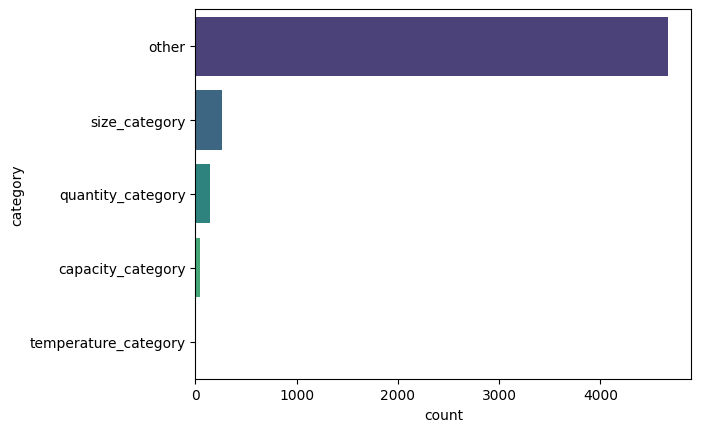

In [40]:
# Utiliser groupby pour compter les occurrences des paires
category_counts = df.groupby('category').size().reset_index(name='count')
category_counts['count'] = category_counts['count'] / 2

# Trier pour afficher le classement
ranked_categories = category_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

sns.barplot(x='count', y='category', data=ranked_categories.head(15), palette='viridis')

# 2. Name

In [29]:
def classify_word(word):
    # Vérifier si le mot est un nom propre ou un nom commun
    if word[0].isupper():
        return "proper name"
    else:
        return "common name"

# Appliquer la fonction aux colonnes option1 et option2
df['option1_type'] = df['option1'].apply(classify_word)
df['option2_type'] = df['option2'].apply(classify_word)

# Ajouter une colonne qui combine les deux informations
df['options_type'] = df.apply(
    lambda row: f"{row['option1_type']} / {row['option2_type']}", axis=1
)

df

,qID,sentence,option1,option2,answer,GroupID,diff1,diff2,sorted_pair,option1_type,option2_type,options_type
0,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,2,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE,despised,enjoyed,"(despised, enjoyed)",proper name,proper name,proper name / proper name
1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE,despised,enjoyed,"(despised, enjoyed)",proper name,proper name,proper name / proper name
2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1,"He never comes to my home, but I always go to ...",home,house,1,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4,smaller,bigger,"(bigger, smaller)",common name,common name,common name / common name
3,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2,"He never comes to my home, but I always go to ...",home,house,2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4,smaller,bigger,"(bigger, smaller)",common name,common name,common name / common name
4,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2,"Kyle doesn't wear leg warmers to bed, while Lo...",Kyle,Logan,2,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH,colder,warmer,"(colder, warmer)",proper name,proper name,proper name / proper name
...,...,...,...,...,...,...,...,...,...,...,...,...
10229,391JB9X4Z0MKRYGJWQK2RMI7S79MKF-1,"Paint was applied to the scooter, but not the ...",scooter,car,1,391JB9X4Z0MKRYGJWQK2RMI7S79MKF,storage,"an, accident","(an, accident, storage)",common name,common name,common name / common name
10230,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL-1,Eric was looking through the old temple and fo...,Eric,Matthew,1,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL,explorer,mummy,"(explorer, mummy)",proper name,proper name,proper name / proper name
10231,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL-2,Eric was looking through the old temple and fo...,Eric,Matthew,2,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL,explorer,mummy,"(explorer, mummy)",proper name,proper name,proper name / proper name
10232,32L724R85LIKCHO145FI3C9HCFHPIR-2,The dentist did not scold Natalie for not flos...,Natalie,Emily,2,32L724R85LIKCHO145FI3C9HCFHPIR,,scolded,"(, scolded)",proper name,proper name,proper name / proper name


<ipython-input-30-df7f778b776d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='options_type', data=df, order=df['options_type'].value_counts().index, palette='viridis')


<Axes: xlabel='count', ylabel='options_type'>

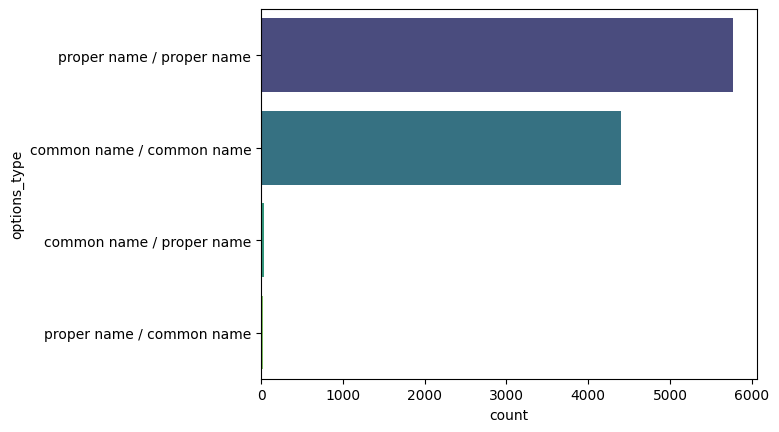

In [30]:
sns.countplot(y='options_type', data=df, order=df['options_type'].value_counts().index, palette='viridis')

In [49]:
df['couple_option'] = df.apply(
    lambda row: f"{row['option1']} / {row['option2']}", axis=1
)

couple_counts = df['couple_option'].value_counts()

# Sélectionner les couples les plus fréquents (par exemple, top 5)
top_couples = couple_counts.head(10)

#top_couples.plot(kind='bar', color='skyblue')
top_couples

,count
couple_option,
Amy / Patricia,14
Katrina / Carrie,14
Cynthia / Victoria,14
Michael / Craig,14
Felicia / Christine,14
Angela / Rachel,12
Christine / Monica,12
Rachel / Betty,12
Sarah / Kayla,12


In [51]:
all_names = pd.concat([df['option1'], df['option2']])

# Compter les occurrences de chaque prénom
name_counts = all_names.value_counts()

# Afficher le classement sous forme de tableau
print("Classement des prénoms les plus populaires :")
print(name_counts.head(20))

Classement des prénoms les plus populaires :
Sarah        244
Elena        242
Victoria     234
Lindsey      230
Carrie       220
Jessica      218
Monica       218
Mary         214
Tanya        214
Cynthia      212
Rachel       210
Natalie      210
Katrina      208
Samantha     208
Kayla        206
Christine    206
Felicia      200
Emily        198
Betty        198
Laura        198
Name: count, dtype: int64
